In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [3]:
mat = np.column_stack((X, y))
df = pd.DataFrame(mat, columns=np.append(feature_names, 'MedianValue'))
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedianValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
X_with_bias = np.column_stack((np.ones(len(X)), X))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2, random_state=0)

In [7]:
def closed_form_solution(X, y):
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w  

In [8]:
w = closed_form_solution(X_train, y_train)
print(w)

[-3.68585691e+01  4.33333407e-01  9.29324337e-03 -9.86433739e-02
  5.93215487e-01 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01
 -4.34166041e-01]


In [9]:
y_train_pred = X_train @ w

In [10]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train, y_train_pred)
print(f'R2 score (train): {train_score:.5f}')

R2 score (train): 0.60890


In [11]:
y_test_pred = X_test @ w

test_score = r2_score(y_test, y_test_pred)
print(f'R2 score (test): {test_score:.5f}')

R2 score (test): 0.59432


LinearRegression Class

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
print(reg.intercept_)
print(reg.coef_)

-36.858569106801234
[ 4.33333407e-01  9.29324337e-03 -9.86433739e-02  5.93215487e-01
 -7.56192502e-06 -4.74516383e-03 -4.21449336e-01 -4.34166041e-01]


In [15]:
train_score = reg.score(X_train, y_train)
print(f'R2 score (train): {train_score:.5f}')

test_score = reg.score(X_test, y_test)
print(f'R2 score (test): {test_score:.5f}')

R2 score (train): 0.60890
R2 score (test): 0.59432


Analyzing the Errors

In [16]:
def plot_residuals(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, s=2, marker='o', c='b', label='Training')    
    plt.scatter(y_test_pred, y_test_pred - y_test, s=2, marker='s', c='m', label='Test') 
        
    xmin = min(y_train_pred.min(), y_test_pred.min())
    xmax = max(y_train_pred.max(), y_test_pred.max())
    plt.hlines(y=0, xmin=xmin, xmax=xmax, color='black')    
    
    plt.xlim(xmin, xmax)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()

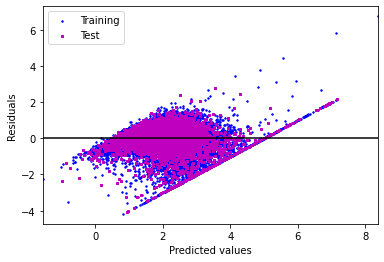

In [17]:
plot_residuals(y_train_pred, y_train, y_test_pred, y_test)
plt.savefig('figures/residuals.pdf')

SGD

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', SGDRegressor())
])

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', SGDRegressor())])

In [20]:
train_score = pipeline.score(X_train, y_train)
print(f'R2 score (train): {train_score:.5f}')

test_score = pipeline.score(X_test, y_test)
print(f'R2 score (test): {test_score:.5f}')

R2 score (train): -511.04956
R2 score (test): -4735.61566


In [21]:
pipeline.set_params(reg__eta0=0.001)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', SGDRegressor(eta0=0.001))])

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', SGDRegressor(eta0=0.001))])

In [23]:
train_score = pipeline.score(X_train, y_train)
print(f'R2 score (train): {train_score:.5f}')

test_score = pipeline.score(X_test, y_test)
print(f'R2 score (test): {test_score:.5f}')

R2 score (train): 0.60177
R2 score (test): 0.58408
